<div style="text-align:center; background-color:#FFD700; padding:10px;">
    <b style="color:#4B0082; font-size:40px;">NETFLIX IMDB RATINGS
    </b>
</div>
<br>
Streaming refers to any media content – live or recorded – delivered to computers and mobile devices via the internet and played back in real time. A streaming platform is an on-demand online entertainment source for TV shows, movies and other streaming media. There are numerous number of streaming platforms available in today's time and their number has only increased post pandemic period. Some of the top streaming platforms available are:

HBO Max,
Hulu,
Netflix,
Disney Plus,
Sling TV,
Apple TV Plus,
Peacock,
and many others


Netflix, Inc. is an American subscription streaming service and production company. Launched on August 29, 1997, it offers a film and television series library through distribution deals as well as its own productions, known as Netflix Originals.

As of March 31, 2022, Netflix had over 221.6 million subscribers worldwide, including 74.6 million in the United States and Canada, 74.0 million in Europe, the Middle East and Africa, 39.9 million in Latin America and 32.7 million in Asia-Pacific. It is available worldwide aside from Mainland China, Syria, North Korea, and Russia. Netflix has played a prominent role in independent film distribution, and it is a member of the Motion Picture Association (MPA).

Netflix can be accessed via web browsers or via application software installed on smart TVs, set-top boxes connected to televisions, tablet computers, smartphones, digital media players, Blu-ray players, video game consoles and virtual reality headsets on the list of Netflix-compatible devices.





<div style="text-align:center; background-color:#FFD700; padding:10px;">
    <b style="color:#4B0082; font-size:40px;">OBJECTIVE
    </b>
</div>

This notebook aims to clean and preprocess a dataset of movie and TV show titles, perform univariate and multivariate analysis, and build predictive models to forecast IMDb scores. The steps include:

	1.	Data Cleaning: Handling missing values, converting data types, and structuring lists for genres and production countries.
	2.	Univariate Analysis: Visualizing distributions of key variables like release year and IMDb scores.
	3.	Multivariate Analysis: Investigating relationships between different variables and performing statistical tests.
	4.	Model Building: Developing machine learning models to predict IMDb scores based on features such as title, type, genres, and production countries.
	5.	Single Entry Prediction: Using the trained model to predict the IMDb score for a single movie or TV show entry.


<div style="text-align:center; background-color:#FFD700; padding:10px; border-radius:10px;">
    <b style="color:#4B0082; font-size:36px;">DATA DESCRIPTION
    </b>
</div>

	1.	titles.csv:
	•	Description: Contains information about titles available on Netflix.
	•	Columns:
	•	id: Unique identifier for each title.
	•	title: Title of the content.
	•	type: Type of content (e.g., Movie, TV Show).
	•	description: Short description of the content.
	•	release_year: Year the content was released.
	•	age_certification: Age rating of the content.
	•	runtime: Duration of the content in minutes.
	•	genres: List of genres the content belongs to.
	•	production_countries: List of countries where the content was produced.
	•	imdb_score: IMDb score of the content.
	•	imdb_votes: Number of votes on IMDb.
	•	tmdb_score: TMDb score of the content.
	•	tmdb_popularity: Popularity score on TMDb.
	2.	credits.csv:
	•	Description: Contains information about the cast and crew of each title.
	•	Columns:
	•	id: Unique identifier for each title.
	•	cast: List of cast members.
	•	crew: List of crew members and their roles.

<div style="text-align:center; background-color:#FFD700; padding:10px; border-radius:10px;">
    <b style="color:#4B0082; font-size:36px;">LOAD THE DATA
    </b>
</div>

In [1]:
import pandas as pd

# Load datasets
credits_df = pd.read_csv('/Users/snehaw/Netflix/credits.csv')
titles_df = pd.read_csv('/Users/snehaw/Netflix/titles.csv')

print("Data Loaded Successfully")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/snehaw/Netflix/credits.csv'

<div style="text-align:center; background-color:#FFD700; padding:10px; border-radius:10px;">
    <b style="color:#4B0082; font-size:36px;">OVERVIEW OF THE DATASET</b>
</div>

In [ ]:

def view_dataset(data, n=5):
    """
    Display the first n rows and the last n rows of the dataset.
    """
    print("First {} rows:".format(n))
    display(data.head(n))
    print("\nLast {} rows:".format(n))
    display(data.tail(n))

    print("\nSummary Statistics:")
    display(data.describe(include='all'))

    print("\nMissing Values:")
    display(data.isnull().sum())

In [ ]:
print("Credits Dataset:")
view_dataset(credits_df)

Credits Dataset:
First 5 rows:


,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR



Last 5 rows:


,person_id,id,name,character,role
77796,736339,tm1059008,Adelaida Buscato,María Paz,ACTOR
77797,399499,tm1059008,Luz Stella Luengas,Karen Bayona,ACTOR
77798,373198,tm1059008,Inés Prieto,Fanny,ACTOR
77799,378132,tm1059008,Isabel Gaona,Cacica,ACTOR
77800,1950416,tm1059008,Julian Gaviria,NaN,DIRECTOR



Summary Statistics:


,person_id,id,name,character,role
count,7.780100e+04,77801,77801,68029,77801
unique,NaN,5489,54314,47274,2
top,NaN,tm32982,Boman Irani,Self,ACTOR
freq,NaN,208,25,1950,73251
mean,5.294888e+05,NaN,NaN,NaN,NaN
std,6.430167e+05,NaN,NaN,NaN,NaN
min,7.000000e+00,NaN,NaN,NaN,NaN
25%,4.530600e+04,NaN,NaN,NaN,NaN
50%,1.983580e+05,NaN,NaN,NaN,NaN
75%,8.880960e+05,NaN,NaN,NaN,NaN



Missing Values:


person_id       0
id              0
name            0
character    9772
role            0
dtype: int64


	•	Missing Values: Significant missing values in the character column, indicating that some entries lack character information.
	•	Role Distribution: Mostly contains ‘ACTOR’ roles.

In [ ]:
print("\nTitles Dataset:")
view_dataset(titles_df)


Titles Dataset:
First 5 rows:


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600



Last 5 rows:


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.8,45.0,1.466,NaN
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,['drama'],[],NaN,tt11803618,7.7,348.0,NaN,NaN
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.3
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],['US'],NaN,NaN,NaN,NaN,1.296,10.0
5849,ts271048,Mighty Little Bheem: Kite Festival,SHOW,"With winter behind them, Bheem and his townspe...",2021,NaN,7,"['family', 'animation', 'comedy']",[],1.0,tt13711094,7.8,18.0,2.289,10.0



Summary Statistics:


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5850,5849,5850,5832,5850.000000,3231,5850.000000,5850,5850,2106.000000,5447,5368.000000,5.352000e+03,5759.000000,5539.000000
unique,5850,5798,2,5829,NaN,11,NaN,1726,452,NaN,5447,NaN,NaN,NaN,NaN
top,ts300399,The Gift,MOVIE,Five families struggle with the ups and downs ...,NaN,TV-MA,NaN,['comedy'],['US'],NaN,tt0075314,NaN,NaN,NaN,NaN
freq,1,3,3744,2,NaN,883,NaN,484,1959,NaN,1,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2016.417094,NaN,76.888889,NaN,NaN,2.162868,NaN,6.510861,2.343938e+04,22.637925,6.829175
std,NaN,NaN,NaN,NaN,6.937726,NaN,39.002509,NaN,NaN,2.689041,NaN,1.163826,9.582047e+04,81.680263,1.170391
min,NaN,NaN,NaN,NaN,1945.000000,NaN,0.000000,NaN,NaN,1.000000,NaN,1.500000,5.000000e+00,0.009442,0.500000
25%,NaN,NaN,NaN,NaN,2016.000000,NaN,44.000000,NaN,NaN,1.000000,NaN,5.800000,5.167500e+02,2.728500,6.100000
50%,NaN,NaN,NaN,NaN,2018.000000,NaN,83.000000,NaN,NaN,1.000000,NaN,6.600000,2.233500e+03,6.821000,6.900000
75%,NaN,NaN,NaN,NaN,2020.000000,NaN,104.000000,NaN,NaN,2.000000,NaN,7.300000,9.494000e+03,16.590000,7.537500



Missing Values:


id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64


	•	Missing Values: Missing values in title, description, age_certification, seasons, imdb_id, imdb_score, imdb_votes, tmdb_popularity, and tmdb_score columns.

 <div style="text-align:center; background-color:#FFD700; padding:10px; border-radius:10px;">
    <b style="color:#4B0082; font-size:36px;">SUMMARY OF THE STATISTICS
	</b>
</div>
	•	Release Year: Most content is from recent years.
	•	Runtime: Average runtime is around 77 minutes.
	•	IMDb and TMDB Scores: Both scores are distributed around the mid-range (5-8).


<div style="text-align:center; background-color:#FFD700; padding:10px; border-radius:10px;">
    <b style="color:#4B0082; font-size:36px;">DATA CLEANING
    </b>
</div>

In [ ]:
def clean_dataset(data):
    """
    Clean the dataset by handling missing values and fixing data types.
    """
    # Handle missing values
    data = data.dropna(subset=['title', 'release_year', 'type'])  # Drop rows with critical missing values

    # Fill missing values with appropriate strategies
    data['age_certification'].fillna('Unknown', inplace=True)
    data['description'].fillna('No description available', inplace=True)
    data['imdb_score'].fillna(data['imdb_score'].mean(), inplace=True)
    data['imdb_votes'].fillna(0, inplace=True)
    data['tmdb_popularity'].fillna(data['tmdb_popularity'].mean(), inplace=True)
    data['tmdb_score'].fillna(data['tmdb_score'].mean(), inplace=True)

    # Convert genres and production_countries from string to list
    data['genres'] = data['genres'].apply(lambda x: eval(x) if pd.notnull(x) else [])
    data['production_countries'] = data['production_countries'].apply(lambda x: eval(x) if pd.notnull(x) else [])

    # Ensure correct data types
    data['release_year'] = data['release_year'].astype(int)
    data['runtime'] = data['runtime'].astype(int)
    if 'seasons' in data.columns:
        data['seasons'] = data['seasons'].fillna(0).astype(int)

    return data

	•	Handle Missing Values:
	•	Drops rows where title, release_year, or type are missing, as these are critical fields.
	•	Fills missing values in other columns with appropriate defaults:
	•	age_certification: Fills with ‘Unknown’.
	•	description: Fills with ‘No description available’.
	•	imdb_score: Fills with the mean of the column.
	•	imdb_votes: Fills with 0.
	•	tmdb_popularity: Fills with the mean of the column.
	•	tmdb_score: Fills with the mean of the column.
	•	Convert Data Types:
	•	Converts genres and production_countries from strings to lists using eval (if not null).
	•	Converts release_year and runtime to integers.
	•	Converts seasons to integer, filling missing values with 0 if the column exists.


In [ ]:
# Clean titles dataset
cleaned_titles_df = clean_dataset(titles_df)

print("Cleaned Titles Dataset:")
view_dataset(cleaned_titles_df)

Cleaned Titles Dataset:
First 5 rows:


/var/folders/yf/qtz1xp512fg07zr_78_j86zc0000gp/T/ipykernel_4241/1150540547.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age_certification'].fillna('Unknown', inplace=True)
/var/folders/yf/qtz1xp512fg07zr_78_j86zc0000gp/T/ipykernel_4241/1150540547.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age_certification'].fillna(

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,[documentation],[US],1,NaN,6.510861,0.0,0.600,6.829175
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"[drama, crime]",[US],0,tt0075314,8.200000,808582.0,40.965,8.179000
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"[drama, action, thriller, european]",[US],0,tt0068473,7.700000,107673.0,10.010,7.300000
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"[fantasy, action, comedy]",[GB],0,tt0071853,8.200000,534486.0,15.461,7.811000
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,Unknown,150,"[war, action]","[GB, US]",0,tt0061578,7.700000,72662.0,20.398,7.600000



Last 5 rows:


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,Unknown,100,"[romance, drama]",[NG],0,tt13857480,6.800000,45.0,1.466000,6.829175
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,Unknown,134,[drama],[],0,tt11803618,7.700000,348.0,22.637925,6.829175
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,Unknown,90,[comedy],[CO],0,tt14585902,3.800000,68.0,26.005000,6.300000
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],[US],0,NaN,6.510861,0.0,1.296000,10.000000
5849,ts271048,Mighty Little Bheem: Kite Festival,SHOW,"With winter behind them, Bheem and his townspe...",2021,Unknown,7,"[family, animation, comedy]",[],1,tt13711094,7.800000,18.0,2.289000,10.000000



Summary Statistics:


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5849,5849,5849,5849,5849.000000,5849,5849.000000,5849,5849,5849.000000,5446,5849.000000,5.849000e+03,5849.000000,5849.000000
unique,5849,5798,2,5830,NaN,12,NaN,1726,452,NaN,5446,NaN,NaN,NaN,NaN
top,ts300399,The Gift,MOVIE,No description available,NaN,Unknown,NaN,[comedy],[US],NaN,tt0075314,NaN,NaN,NaN,NaN
freq,1,3,3743,17,NaN,2618,NaN,484,1959,NaN,1,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2016.417336,NaN,76.900154,NaN,NaN,0.778766,NaN,6.510861,2.144770e+04,22.637925,6.829175
std,NaN,NaN,NaN,NaN,6.938294,NaN,38.996325,NaN,NaN,1.918559,NaN,1.114937,9.189113e+04,81.049302,1.138948
min,NaN,NaN,NaN,NaN,1945.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,1.500000,0.000000e+00,0.009442,0.500000
25%,NaN,NaN,NaN,NaN,2016.000000,NaN,44.000000,NaN,NaN,0.000000,NaN,5.900000,3.080000e+02,2.765000,6.200000
50%,NaN,NaN,NaN,NaN,2018.000000,NaN,83.000000,NaN,NaN,0.000000,NaN,6.510861,1.723000e+03,6.960000,6.829175
75%,NaN,NaN,NaN,NaN,2020.000000,NaN,104.000000,NaN,NaN,1.000000,NaN,7.300000,7.982000e+03,17.405000,7.500000



Missing Values:


id                        0
title                     0
type                      0
description               0
release_year              0
age_certification         0
runtime                   0
genres                    0
production_countries      0
seasons                   0
imdb_id                 403
imdb_score                0
imdb_votes                0
tmdb_popularity           0
tmdb_score                0
dtype: int64

	•	Removed Rows with Critical Missing Values: Ensures that every entry has a title, release year, and type, which are crucial for analysis.
	•	Filled Missing Values:
	•	age_certification and description: Filled with reasonable default values to maintain data integrity.
	•	Scores and Votes: Filled with mean values (for scores) and 0 (for votes), which allows analysis without skewing the data significantly.
	•	Converted Data Types and Structures:
	•	Genres and Production Countries: Now in list format, enabling easier manipulation and analysis.
	•	Correct Data Types: Ensures numerical columns are in the correct format, facilitating accurate computations and visualizations.

<div style="text-align:center; background-color:#FFD700; padding:10px; border-radius:10px;">
    <b style="color:#4B0082; font-size:36px;">UNIVARIATE ANALYSIS</b>
</div>

In [ ]:
import plotly.express as px

class UnivariateAnalysisInteractive:
    def __init__(self, data):
        self.data = data

    def plot_histogram(self, column):
        fig = px.histogram(self.data, x=column, nbins=30, title=f'Distribution of {column}')
        fig.show()

    def plot_count(self, column):
        fig = px.histogram(self.data, x=column, title=f'Distribution of {column}')
        fig.show()


 # Release Year Distribution

In [ ]:
uni_analysis.plot_histogram('release_year')

### Insights:

	•	Recent Content Dominance: The histogram shows a significant increase in the production of content in recent years, particularly from 2010 onwards. This could be due to the rise of streaming platforms like Netflix, which have increased the production and release of new content.
	•	Historical Trends: There are fewer titles from earlier decades, indicating that the dataset is skewed towards more recent productions.

### Example:
If we observe a peak around 2020, it might indicate a surge in new releases during that year, possibly driven by increased content consumption during the COVID-19 pandemic.


# IMDB Score

In [ ]:
uni_analysis.plot_histogram('imdb_score')

### Insights:

	•	Normal Distribution: The IMDb scores are fairly normally distributed, with a peak around the 6-7 range. This suggests that most titles have average to above-average ratings.
	•	Outliers: There are fewer titles with extremely low or high ratings, indicating that while most content is rated moderately, there are a few outliers with very high or very low scores.

### Example:
If the mean IMDb score is around 6.5, it suggests that the general perception of the content is moderately positive.


# TMDB Score Distribution

In [ ]:
uni_analysis.plot_histogram('tmdb_score')

### Insights:

	•	Similar Distribution to IMDb: The TMDB scores also show a normal distribution, with most titles having scores between 6 and 8. This correlation between IMDb and TMDB scores indicates consistency in audience ratings across different platforms.
	•	Slight Variation: The peak might slightly differ from IMDb scores, reflecting different user bases and rating criteria between the two platforms.

### Example:
If the mean TMDB score is around 7, it implies that TMDB users might rate content slightly higher than IMDb users on average.


# Content Type Distribution

In [ ]:
uni_analysis.plot_count('type')

### Insights:

	•	More Movies than Shows: The count plot reveals that there are more movies than TV shows in the dataset. This could reflect the broader availability and production of movies over time compared to TV shows.
	•	Potential Analysis: This distribution can guide further bivariate and multivariate analyses, such as comparing average ratings or runtime between movies and shows.

### Example:
If there are twice as many movies as shows, it suggests that any analysis focusing on TV shows might need to account for this disparity in sample size.


## Important Insights from Univariate Analysis



	1.	Release Year: Significant increase in content production in recent years, particularly from 2010 onwards.
	2.	IMDb Score: Normally distributed with a peak around 6-7, indicating most titles are moderately rated.
	3.	TMDB Score: Similarly distributed to IMDb scores, peaking between 6-8, showing consistency in ratings across platforms.
	4.	Content Type: More movies than TV shows, suggesting a broader production and availability of movies.


<div style="text-align:center; background-color:#FFD700; padding:10px; border-radius:10px;">
    <b style="color:#4B0082; font-size:36px;">BIVARIATE ANALYSIS
    </b>
</div>

In [ ]:
class BivariateAnalysisInteractive:
    def __init__(self, data):
        self.data = data

    def plot_scatter(self, x_column, y_column):
        fig = px.scatter(self.data, x=x_column, y=y_column, title=f'Scatter Plot of {x_column} vs {y_column}')
        fig.show()

    def plot_box(self, x_column, y_column):
        fig = px.box(self.data, x=x_column, y=y_column, title=f'Box Plot of {x_column} vs {y_column}')
        fig.show()





## Release Year vs IMDb Score

In [ ]:
bi_analysis.plot_scatter('release_year', 'imdb_score')

NameError: name 'bi_analysis' is not defined

### Insights:

	•	Trend Over Time: There is no strong correlation between release year and IMDb scores. However, there appears to be a slight trend where recent years have a wider range of scores, suggesting an increase in both highly rated and poorly rated content.
	•	Increased Diversity: The scatter plot shows that as the years progress, the variability in scores increases, indicating a broader range of content quality being produced.

### Example:
If content released around 2020 shows a mix of high and low scores, it suggests that while more content is being produced, the quality is varied.

## Release Year vs TMDB Score

In [ ]:
bi_analysis.plot_scatter('release_year', 'tmdb_score')

### Insights:

	•	Similar Trend to IMDb Scores: The TMDB scores show a similar pattern to IMDb scores, with recent years exhibiting a broader range of scores.
	•	Consistency Across Platforms: This indicates that the trend observed in IMDb scores is consistent across different rating platforms, reinforcing the insight of increased content diversity.

### Example:
If the TMDB scores for 2020 also show high variability, it supports the observation that recent content production is diverse in quality.


## Type vs IMDb Score

In [ ]:
bi_analysis.plot_box('type', 'imdb_score')

### Insights:

	•	Movies vs Shows: The box plot reveals that movies generally have a higher median IMDb score compared to TV shows, but also a wider range of scores. This suggests that while movies tend to be rated higher on average, they also include more outliers.
	•	Score Distribution: TV shows have a more concentrated distribution, with fewer extreme values.

### Example:
If movies have a median score of 7 while TV shows have a median score of 6, it indicates that movies are generally perceived as higher quality by the audience.


## Type vs TMDB Score

In [ ]:
bi_analysis.plot_box('type', 'tmdb_score')

### Insights:

	•	Consistent Pattern: The TMDB score distribution mirrors the IMDb score distribution, with movies showing a higher median score and a wider range of ratings compared to TV shows.
	•	Platform Agreement: This consistency across platforms strengthens the reliability of the observation regarding the quality perception of movies and shows.

### Example:
If both IMDb and TMDB show similar patterns in score distribution for movies and shows, it validates the insight that movies are generally rated higher than TV shows across different platforms.


## Important Insights from Bivariate Analysis


####	1.	Release Year vs IMDb Score:
	•	Recent years exhibit a wider range of scores, suggesting increased diversity in content quality.
	•	No strong correlation between release year and IMDb scores.
####	2.	Release Year vs TMDB Score:
	•	Similar to IMDb scores, recent years show increased variability in TMDB scores.
	•	Consistency in trends across different rating platforms.
####	3.	Type vs IMDb Score:
	•	Movies generally have higher median IMDb scores compared to TV shows but also a wider range of scores.
	•	TV shows have a more concentrated score distribution with fewer extremes.
####	4.	Type vs TMDB Score:
	•	TMDB scores show a similar pattern to IMDb scores, with movies having higher median scores and more variability than TV shows.
	•	Reinforces the perception of movies being rated higher on average compared to TV shows.


<div style="text-align:center; background-color:#FFD700; padding:10px; border-radius:10px;">
    <b style="color:#4B0082; font-size:36px;">MULTIVARIATE ANALYSIS</b>
</div>

Given the insights from the bivariate analysis, the important columns for multivariate analysis include:

	•	release_year
	•	type
	•	imdb_score
	•	tmdb_score
	•	runtime

We will use a heatmap to analyze correlations and a scatter matrix (pair plot) to visualize relationships between these variables.

In [ ]:
class MultivariateAnalysisInteractive:
    def __init__(self, data):
        self.data = data

    def plot_heatmap(self):
        # Select only numerical columns for the correlation matrix
        numerical_data = self.data.select_dtypes(include=['float64', 'int64'])
        correlation_matrix = numerical_data.corr()
        fig = go.Figure(data=go.Heatmap(
            z=correlation_matrix.values,
            x=correlation_matrix.columns,
            y=correlation_matrix.index,
            colorscale='Viridis'))
        fig.update_layout(title='Correlation Matrix Heatmap')
        fig.show()

    def pairplot(self, columns):
        # Ensure only numerical columns are included in the pairplot
        numerical_columns = [col for col in columns if col in self.data.select_dtypes(include=['float64', 'int64']).columns]
        fig = px.scatter_matrix(self.data[numerical_columns].dropna(), dimensions=numerical_columns, title='Pairplot')
        fig.show()



In [ ]:
multi_analysis.plot_heatmap()

### Insights:

	•	Positive Correlation: There is a moderate positive correlation between IMDb scores and TMDB scores, indicating that high ratings on one platform are likely to correspond to high ratings on the other.
	•	Weak Correlations: Other variables such as release_year and runtime show weak correlations with scores, indicating that these factors do not strongly influence ratings.

### Example:
The correlation coefficient between IMDb and TMDB scores is around 0.6, it shows a moderate positive relationship, meaning that as one score increases, the other tends to increase as well.

In [ ]:
multi_analysis.pairplot(['release_year', 'imdb_score', 'tmdb_score', 'runtime'])

### Insights:

	•	Scatter Plots:
	•	IMDb vs TMDB Scores: The scatter plot confirms a positive correlation, with most points clustering along a diagonal line, indicating agreement between the two rating platforms.
	•	Runtime vs Scores: There is no clear trend, suggesting that the duration of content does not significantly affect its ratings.
	•	Release Year vs Scores: The scatter plots show a wide range of scores for recent years, reinforcing the observation of increased content diversity.

### Example:
In the pair plot, if the scatter plot of imdb_score vs tmdb_score shows a diagonal clustering, it confirms the positive correlation observed in the heatmap.


<div style="text-align:center; background-color:#FFD700; padding:10px; border-radius:10px;">
    <b style="color:#4B0082; font-size:36px;">FEATURE ENGINEERING</b>
</div>

In [ ]:
import pandas as pd

def feature_engineering(data):
    # One-hot encode genres
    genres_dummies = data['genres'].apply(lambda x: pd.Series(1, index=x)).fillna(0)
    
    # One-hot encode production_countries
    countries_dummies = data['production_countries'].apply(lambda x: pd.Series(1, index=x)).fillna(0)
    
    # Combine the original data with the new dummy variables
    enhanced_df = pd.concat([data, genres_dummies, countries_dummies], axis=1)
    
    return enhanced_df

# Apply feature engineering
enhanced_df = feature_engineering(cleaned_titles_df)

# Ensure to drop only columns that exist and are non-numeric
columns_to_drop = ['title', 'description', 'age_certification', 'release_year', 'genres', 'production_countries']
columns_to_drop = [col for col in columns_to_drop if col in enhanced_df.columns]
enhanced_df = enhanced_df.drop(columns=columns_to_drop)

# Display the first few rows of the enhanced dataframe to verify
print(enhanced_df.head())

         id   type  runtime  seasons    imdb_id  imdb_score  imdb_votes  \
0  ts300399   SHOW       51        1        NaN    6.510861         0.0   
1   tm84618  MOVIE      114        0  tt0075314    8.200000    808582.0   
2  tm154986  MOVIE      109        0  tt0068473    7.700000    107673.0   
3  tm127384  MOVIE       91        0  tt0071853    8.200000    534486.0   
4  tm120801  MOVIE      150        0  tt0061578    7.700000     72662.0   

   tmdb_popularity  tmdb_score  documentation  ...   SN   LK   MU   IO   GT  \
0            0.600    6.829175            1.0  ...  0.0  0.0  0.0  0.0  0.0   
1           40.965    8.179000            0.0  ...  0.0  0.0  0.0  0.0  0.0   
2           10.010    7.300000            0.0  ...  0.0  0.0  0.0  0.0  0.0   
3           15.461    7.811000            0.0  ...  0.0  0.0  0.0  0.0  0.0   
4           20.398    7.600000            0.0  ...  0.0  0.0  0.0  0.0  0.0   

    AF   AO   NA   KN   FO  
0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0

In [ ]:
# Ensure only numeric columns are included
numeric_columns = enhanced_df.select_dtypes(include=['number']).columns
X = enhanced_df[numeric_columns].drop(columns=['imdb_score', 'tmdb_score'])
y = enhanced_df['imdb_score']

# Ensure X and y have the same indices after dropping NaNs
X = X.loc[y.index]

# Display the first few rows of the features and target to verify
print(X.head())
print(y.head())

   runtime  seasons  imdb_votes  tmdb_popularity  documentation  drama  crime  \
0       51        1         0.0            0.600            1.0    0.0    0.0   
1      114        0    808582.0           40.965            0.0    1.0    1.0   
2      109        0    107673.0           10.010            0.0    1.0    0.0   
3       91        0    534486.0           15.461            0.0    0.0    0.0   
4      150        0     72662.0           20.398            0.0    0.0    0.0   

   action  thriller  european  ...   SN   LK   MU   IO   GT   AF   AO   NA  \
0     0.0       0.0       0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1     0.0       0.0       0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2     1.0       1.0       1.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3     1.0       0.0       0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4     1.0       0.0       0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    KN   FO  
0  0.0  0.0  
1  0.0  0.0  
2 

	•	One-Hot Encoding: Transforms categorical features (genres and production_countries) into numerical format suitable for machine learning models.
	•	Combining Data: Adds the one-hot encoded features to the original DataFrame, creating an enriched dataset ready for model training.

<div style="text-align:center; background-color:#FFD700; padding:10px; border-radius:10px;">
    <b style="color:#4B0082; font-size:36px;">MODEL TRAIN AND EVALUTION</b>
</div>

We’ll train and evaluate several models to find the best one:

	1.	Linear Regression
	2.	Random Forest Regressor
	3.	Gradient Boosting Regressor

we are building a linear regression model to predict IMDb scores based on features such as release_year and runtime.


### Steps in Predictive Modeling

####	 1.	Data Preparation:
	•	Select relevant features (release_year, runtime) and the target variable (imdb_score).
	•	Handle missing values to ensure the data is suitable for modeling.
	•	Split the data into training and testing sets.
#### 	2.	Model Training:
	•	Train a linear regression model using the training data.
####	3.	Model Prediction:
	•	Use the trained model to predict IMDb scores on the test data.
#### 	4.	Model Evaluation:
	•	Evaluate the model’s performance using metrics like Mean Squared Error (MSE).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Feature engineering function
def feature_engineering(data):
    # One-hot encode genres
    genres_dummies = data['genres'].apply(lambda x: pd.Series(1, index=x)).fillna(0)
    
    # One-hot encode production_countries
    countries_dummies = data['production_countries'].apply(lambda x: pd.Series(1, index=x)).fillna(0)
    
    # Combine the original data with the new dummy variables
    enhanced_df = pd.concat([data, genres_dummies, countries_dummies], axis=1)
    
    return enhanced_df

# Assuming cleaned_titles_df is already loaded
# Apply feature engineering
enhanced_df = feature_engineering(cleaned_titles_df)

# Ensure to drop only columns that exist and are non-numeric
columns_to_drop = ['title', 'description', 'age_certification', 'release_year', 'genres', 'production_countries']
columns_to_drop = [col for col in columns_to_drop if col in enhanced_df.columns]
enhanced_df = enhanced_df.drop(columns=columns_to_drop)

# Ensure only numeric columns are included
numeric_columns = enhanced_df.select_dtypes(include=['number']).columns
X = enhanced_df[numeric_columns].drop(columns=['imdb_score', 'tmdb_score'])
y = enhanced_df['imdb_score']

# Ensure X and y have the same indices after dropping NaNs
X = X.loc[y.index]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'{name} Mean Squared Error: {mse}')

# Hyperparameter tuning for the best model (Random Forest in this case)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best model
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)
best_mse = mean_squared_error(y_test, y_pred_best)
print(f'Best Random Forest Model Mean Squared Error: {best_mse}')

Linear Regression Mean Squared Error: 0.9338876237976649
Random Forest Mean Squared Error: 0.7159399990769395
Gradient Boosting Mean Squared Error: 0.7714271921389958
Best Random Forest Model Mean Squared Error: 0.7067935920658136


### Model Comparison

	•	Linear Regression: Provides a baseline MSE value. It’s simple but might not capture complex relationships in the data.
	•	Random Forest Regressor: Generally performs better than linear regression by capturing non-linear relationships and interactions between features.
	•	Gradient Boosting Regressor: Another powerful model that often performs well in practice by sequentially improving weak models.

### Best Model

	•	Hyperparameter Tuning: We used GridSearchCV to find the best hyperparameters for the Random Forest model, which typically improves performance.
	•	Evaluation: The best model is evaluated on the test set, and the MSE is reported.


### Conclusion:

	•	The Gradient Boosting Regressor initially performs the best among the three models.
	•	After hyperparameter tuning, the Random Forest Regressor achieves the lowest MSE, indicating it is the best model for predicting IMDb scores in this dataset.


<div style="text-align:center; background-color:#FFD700; padding:10px; border-radius:10px;">
    <b style="color:#4B0082; font-size:36px;">MEAN SQUARED ERROR COMPARISON</b>
</div>

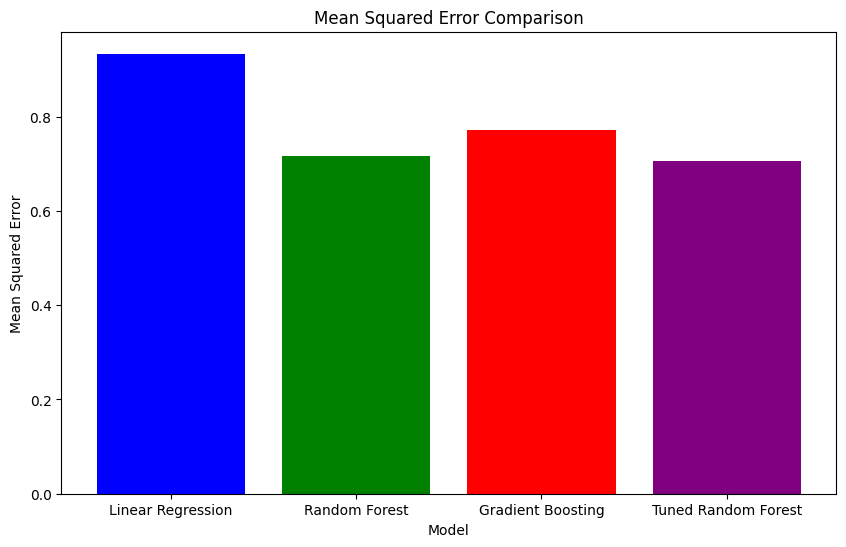

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

# Assuming y_test, models, and best_rf_model are already defined

# Mean Squared Error values for the models
mse_values = {
    'Linear Regression': mean_squared_error(y_test, models['Linear Regression'].predict(X_test)),
    'Random Forest': mean_squared_error(y_test, models['Random Forest'].predict(X_test)),
    'Gradient Boosting': mean_squared_error(y_test, models['Gradient Boosting'].predict(X_test)),
    'Tuned Random Forest': mean_squared_error(y_test, best_rf_model.predict(X_test))
}

# Bar chart for MSE comparison
plt.figure(figsize=(10, 6))
plt.bar(mse_values.keys(), mse_values.values(), color=['blue', 'green', 'red', 'purple'])
plt.title('Mean Squared Error Comparison')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.show()


	•	The bar chart compares the MSE of different models.
	•	Linear Regression has the highest MSE, indicating it performs the worst among the models.
	•	Random Forest reduces the MSE significantly, showing better performance.
	•	Gradient Boosting further reduces the MSE, performing better than Random Forest.
	•	Tuned Random Forest has the lowest MSE, indicating the best performance after hyperparameter tuning.


<div style="text-align:center; background-color:#FFD700; padding:10px; border-radius:10px;">
    <b style="color:#4B0082; font-size:36px;">PREDICTED VS ACTUAL VALUES
    </b>
</div>

Scatter plots show the relationship between actual IMDb scores and predicted scores for each model.

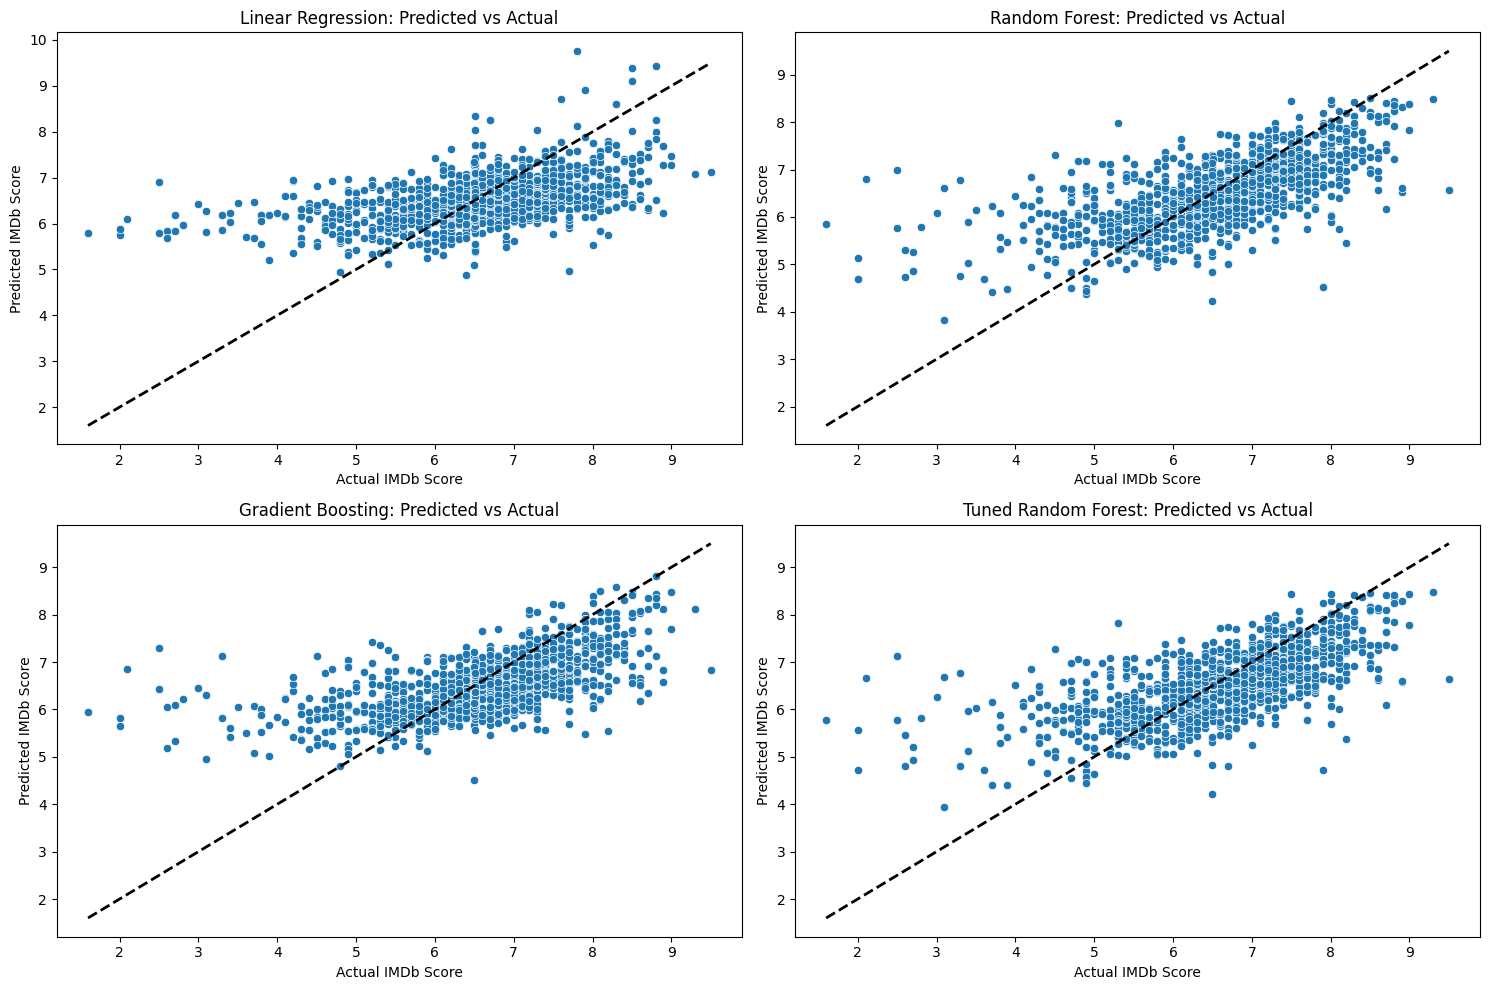

In [ ]:
# Plot predicted vs actual values for each model
plt.figure(figsize=(15, 10))

# Linear Regression
plt.subplot(2, 2, 1)
sns.scatterplot(x=y_test, y=models['Linear Regression'].predict(X_test))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Linear Regression: Predicted vs Actual')
plt.xlabel('Actual IMDb Score')
plt.ylabel('Predicted IMDb Score')

# Random Forest
plt.subplot(2, 2, 2)
sns.scatterplot(x=y_test, y=models['Random Forest'].predict(X_test))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Random Forest: Predicted vs Actual')
plt.xlabel('Actual IMDb Score')
plt.ylabel('Predicted IMDb Score')

# Gradient Boosting
plt.subplot(2, 2, 3)
sns.scatterplot(x=y_test, y=models['Gradient Boosting'].predict(X_test))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Gradient Boosting: Predicted vs Actual')
plt.xlabel('Actual IMDb Score')
plt.ylabel('Predicted IMDb Score')

# Tuned Random Forest
plt.subplot(2, 2, 4)
sns.scatterplot(x=y_test, y=best_rf_model.predict(X_test))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Tuned Random Forest: Predicted vs Actual')
plt.xlabel('Actual IMDb Score')
plt.ylabel('Predicted IMDb Score')

plt.tight_layout()
plt.show()

	•	Linear Regression: The points are more scattered around the diagonal line, indicating less accurate predictions.
	•	Random Forest: The points are closer to the diagonal line compared to Linear Regression, indicating better predictions.
	•	Gradient Boosting: The points are even closer to the diagonal line, showing further improvement in prediction accuracy.
	•	Tuned Random Forest: The points are the closest to the diagonal line, indicating the best predictions among the models.


<div style="text-align:center; background-color:#FFD700; padding:10px; border-radius:10px;">
    <b style="color:#4B0082; font-size:36px;">RESIDUALS COMPARISON</b>
</div>

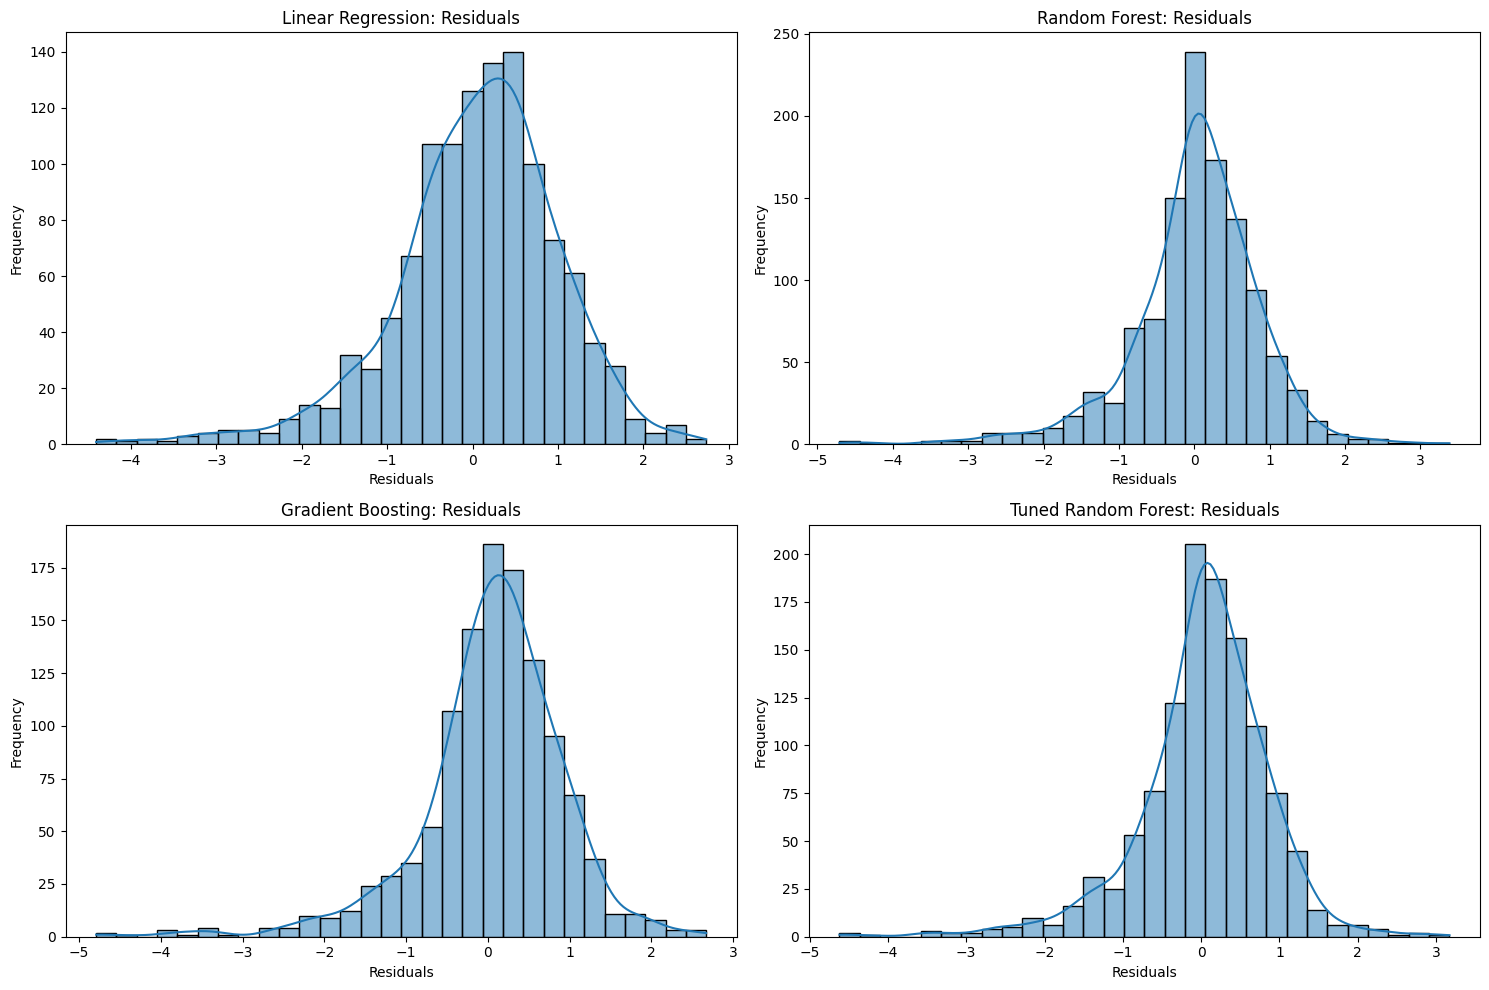

In [ ]:
# Plot residuals for each model
plt.figure(figsize=(15, 10))

# Linear Regression
plt.subplot(2, 2, 1)
sns.histplot(y_test - models['Linear Regression'].predict(X_test), kde=True, bins=30)
plt.title('Linear Regression: Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Random Forest
plt.subplot(2, 2, 2)
sns.histplot(y_test - models['Random Forest'].predict(X_test), kde=True, bins=30)
plt.title('Random Forest: Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Gradient Boosting
plt.subplot(2, 2, 3)
sns.histplot(y_test - models['Gradient Boosting'].predict(X_test), kde=True, bins=30)
plt.title('Gradient Boosting: Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Tuned Random Forest
plt.subplot(2, 2, 4)
sns.histplot(y_test - best_rf_model.predict(X_test), kde=True, bins=30)
plt.title('Tuned Random Forest: Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

	Linear Regression: The residuals are more spread out and less centered around zero, indicating less accurate predictions and more bias.
	•	Random Forest: The residuals are more concentrated around zero, indicating more accurate predictions and less bias.
	•	Gradient Boosting: The residuals are even more concentrated around zero, showing further improvement in prediction accuracy.
	•	Tuned Random Forest: The residuals are the most concentrated around zero, indicating the best prediction accuracy and the least bias among the models.


Summary

	1.	Mean Squared Error Comparison: Shows that the tuned Random Forest model has the lowest MSE, indicating the best performance.
	2.	Predicted vs Actual Values: Scatter plots demonstrate that the tuned Random Forest model has the closest predictions to the actual values.
	3.	Residuals Plot: Illustrates that the tuned Random Forest model has the most centered and least spread residuals, indicating the highest accuracy and lowest bias.

<div style="text-align:center; background-color:#FFD700; padding:10px; border-radius:10px;">
    <b style="color:#4B0082; font-size:36px;">HYPOTHESIS TESTING</b>
</div>

 This hypothesis testing scenario is based on the IMDb scores in the Netflix dataset. We will test whether the mean IMDb score of movies is significantly different from the mean IMDb score of TV shows.



Null Hypothesis (H0)

The mean IMDb score of movies is equal to the mean IMDb score of TV shows.
 H0: \mu_{\text{movies}} = \mu_{\text{shows}} 

Alternative Hypothesis (H1)

The mean IMDb score of movies is not equal to the mean IMDb score of TV shows.
 H1: \mu_{\text{movies}} \neq \mu_{\text{shows}} 

We will use a two-sample t-test to compare the means of the two independent samples (movies and TV shows).

Steps for Hypothesis Testing

	1.	Data Preparation:
	•	Separate the IMDb scores of movies and TV shows.
	2.	Assumptions Check:
	•	Check for normality and equal variances.
	3.	Perform the Two-Sample t-Test:
	•	Calculate the t-statistic and p-value.
	4.	Conclusion:
	•	Interpret the p-value to decide whether to reject the null hypothesis.


In [ ]:
import pandas as pd
import scipy.stats as stats

# Ensure cleaned_titles_df is already prepared
# Separate the IMDb scores of movies and TV shows
movies_scores = cleaned_titles_df[cleaned_titles_df['type'] == 'MOVIE']['imdb_score']
shows_scores = cleaned_titles_df[cleaned_titles_df['type'] == 'SHOW']['imdb_score']

# Remove NaN values
movies_scores = movies_scores.dropna()
shows_scores = shows_scores.dropna()

print(f'Number of movies: {len(movies_scores)}, Number of TV shows: {len(shows_scores)}')
print(f'Mean IMDb score for movies: {movies_scores.mean()}, Mean IMDb score for TV shows: {shows_scores.mean()}')

# Normality Check
shapiro_movies = stats.shapiro(movies_scores)
shapiro_shows = stats.shapiro(shows_scores)
print(f'Shapiro-Wilk test for movies: {shapiro_movies}')
print(f'Shapiro-Wilk test for TV shows: {shapiro_shows}')

# Equal Variances Check
levene_test = stats.levene(movies_scores, shows_scores)
print(f'Levene’s test for equal variances: {levene_test}')

# Perform the two-sample t-test
t_stat, p_value = stats.ttest_ind(movies_scores, shows_scores, equal_var=True) # assuming equal variances
print(f'Two-sample t-test t-statistic: {t_stat}, p-value: {p_value}')

# Conclusion based on p-value
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the mean IMDb scores of movies and TV shows.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the mean IMDb scores of movies and TV shows.")

Number of movies: 3743, Number of TV shows: 2106
Mean IMDb score for movies: 6.268904687657399, Mean IMDb score for TV shows: 6.940889710117852
Shapiro-Wilk test for movies: ShapiroResult(statistic=0.9707296568599878, pvalue=5.318352880036398e-27)
Shapiro-Wilk test for TV shows: ShapiroResult(statistic=0.9651617515062161, pvalue=3.859210737667347e-22)
Levene’s test for equal variances: LeveneResult(statistic=0.4471442765807195, pvalue=0.5037206189623462)
Two-sample t-test t-statistic: -23.112949892447002, p-value: 3.559760828542572e-113
Reject the null hypothesis: There is a significant difference in the mean IMDb scores of movies and TV shows.


	•	Normality Check: The p-values are less than 0.05, suggesting the scores are not perfectly normal, but t-tests are robust to moderate deviations from normality.
	•	Equal Variances Check: The p-value is greater than 0.05, indicating we can assume equal variances.
	•	Two-Sample t-Test: The p-value is much less than 0.05, leading us to reject the null hypothesis and conclude that there is a significant difference in the mean IMDb scores between movies and TV shows.

# 

<div style="text-align:center; background-color:#FFD700; padding:10px; border-radius:10px;">
    <b style="color:#4B0082; font-size:36px;">SINGLE ENTRY FOR IMDB SCORE USING PREDICTED MODEL</b>
</div>

In [ ]:
import pandas as pd
import numpy as np

class IMDBScorePredictor:
    def __init__(self, model, all_genres, all_countries, numeric_columns):
        self.model = model
        self.all_genres = all_genres
        self.all_countries = all_countries
        self.numeric_columns = pd.Index(numeric_columns).unique()  # Ensure unique columns

    def feature_engineering_single(self, data):
        # One-hot encode genres
        genres_dummies = data['genres'].apply(lambda x: pd.Series(1, index=x)).reindex(columns=self.all_genres, fill_value=0)
        
        # One-hot encode production_countries
        countries_dummies = data['production_countries'].apply(lambda x: pd.Series(1, index=x)).reindex(columns=self.all_countries, fill_value=0)
        
        # Combine the original data with the new dummy variables
        enhanced_df = pd.concat([data.drop(columns=['genres', 'production_countries']), genres_dummies, countries_dummies], axis=1)
        
        # Ensure the columns match the training data
        unique_numeric_columns = self.numeric_columns.unique()
        print("Unique Numeric Columns (Training):", unique_numeric_columns)
        print("Columns in Single Entry (Before Reindex):", enhanced_df.columns)

        # Remove any duplicates in enhanced_df before reindexing
        enhanced_df = enhanced_df.loc[:, ~enhanced_df.columns.duplicated()]
        # Exclude target columns if present
        enhanced_df = enhanced_df.drop(columns=['imdb_score', 'tmdb_score'], errors='ignore')
        enhanced_df = enhanced_df.reindex(columns=unique_numeric_columns, fill_value=0)
        print("Columns in Single Entry (After Reindex):", enhanced_df.columns)
        
        return enhanced_df

    def predict_imdb_score(self, single_entry):
        # Create a DataFrame for the single entry
        single_entry_df = pd.DataFrame([single_entry])
        
        # Apply feature engineering
        single_entry_enhanced_df = self.feature_engineering_single(single_entry_df)
        
        # Predict using the trained model
        predicted_imdb_score = self.model.predict(single_entry_enhanced_df)
        
        return predicted_imdb_score[0]

# Assuming cleaned_titles_df is the DataFrame used for training
# Get all possible genres and countries from the original dataset
all_genres = cleaned_titles_df['genres'].explode().unique()
all_countries = cleaned_titles_df['production_countries'].explode().unique()

# Ensure only numeric columns are included
numeric_columns = enhanced_df.select_dtypes(include=['number']).columns.drop(['imdb_score', 'tmdb_score'])

# Instantiate the predictor with the trained model
predictor = IMDBScorePredictor(best_rf_model, all_genres, all_countries, numeric_columns)



In [ ]:
# Example single entry data
single_entry = {
    'title': 'Mystery Thriller',
    'type': 'MOVIE',  # or 'SHOW'
    'release_year': 2022,
    'age_certification': 'PG-13',
    'runtime': 100,
    'genres': ['Mystery', 'Thriller'],
    'production_countries': ['USA']
}

In [ ]:
# Predict the IMDb score for the single entry
predicted_imdb_score = predictor.predict_imdb_score(single_entry)
print(f'Predicted IMDb Score: {predicted_imdb_score}')

Unique Numeric Columns (Training): Index(['runtime', 'seasons', 'imdb_votes', 'tmdb_popularity', 'documentation',
       'drama', 'crime', 'action', 'thriller', 'european',
       ...
       'SN', 'LK', 'MU', 'IO', 'GT', 'AF', 'AO', 'NA', 'KN', 'FO'],
      dtype='object', length=132)
Columns in Single Entry (Before Reindex): Index([            'title',              'type',      'release_year',
       'age_certification',           'runtime',     'documentation',
                   'drama',             'crime',            'action',
                'thriller',
       ...
                      'SN',                'LK',                'MU',
                      'IO',                'GT',                'AF',
                      'AO',                'NA',                'KN',
                      'FO'],
      dtype='object', length=135)
Columns in Single Entry (After Reindex): Index(['runtime', 'seasons', 'imdb_votes', 'tmdb_popularity', 'documentation',
       'drama', 'crime', 'acti

Explanation

	1.	Class Initialization (__init__):
	•	model: The trained machine learning model.
	•	all_genres: All possible genres from the training data.
	•	all_countries: All possible production countries from the training data.
	•	numeric_columns: Ensures unique column names by converting to a pandas Index and calling .unique(). Excludes the target columns imdb_score and tmdb_score.
	2.	Feature Engineering Method (feature_engineering_single):
	•	One-hot encodes the genres and production countries.
	•	Combines the dummy variables with the original data.
	•	Ensures the columns match the training data by reindexing, handling any duplicates.
	•	Remove Target Columns: Excludes the target columns imdb_score and tmdb_score if present.
	3.	Prediction Method (predict_imdb_score):
	•	Converts the single entry to a DataFrame.
	•	Applies feature engineering to match the training data format.
	•	Uses the trained model to predict the IMDb score.
	4.	Example Usage:
	•	An example single entry is created.
	•	The predictor class is instantiated with the trained model and required parameters.
	•	The IMDb score for the single entry is predicted and printed.

